Biopython tiene una libreria que permite graficar genes, en está ocasión ocuparemos *GenomeDiagram* para graficar bloques y flechas que simulen un gen.

1. Activen el ambiente conda 

    $ conda activate dbclass_py3


2. Importen las librerias a usar:

    $ pip install biopython

    $ pip install ReportLab


In [1]:
# Importar las librerias
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation
from IPython.core.display import Image

El objeto *GenomeDiagram* se inicializa con un nombre, después se le agrega un track vacio y se prepara para agregar "características" al objeto.

In [2]:
gdd = GenomeDiagram.Diagram('Test Diagram')
gdt_features = gdd.new_track(1, greytrack=False)
gds_features = gdt_features.new_set()

Se agregan nuevas "características" al objeto *GenomeDiagram* y se especifica la posición en que se requiere dibujar dicho objeto (como puede ser un exon, promotor, gen, etc). 

Existen 3 opciones para plotear "strand":

a) __+1__: Quiere decir que se encuentra en *forward* strand o 5' a 3'

b) __None__: Quiere decir que se graficará en ambos sentidos

c) __-1__ : Quiere decir que se encuentra en *reverse* strand o 3' a 5'


También se pueden modificar la forma del objeto. Por default se obtiene una caja, pero se puede cambiar a flecha usando *sigil="ARROW"*.

Los colores se pueden cambiar, aquí ocupamos la libreria *color* que tiene colores predefinidos, pero también accepta hex color code ("#ad42f5"

In [9]:
# Flecha azul
feature = SeqFeature(FeatureLocation(25, 125), strand=+1)
gds_features.add_feature(feature, name="Forward", sigil="ARROW",label=True, color = colors.blue)

# Bloque verde
feature = SeqFeature(FeatureLocation(150, 250), strand=None)
gds_features.add_feature(feature, name="Strandless", label=True, color = colors.green)

# Flecha roja
feature = SeqFeature(FeatureLocation(275, 375), strand=-1)
gds_features.add_feature(feature, name="Reverse",sigil="ARROW", label=True, color = "#ad42f5")


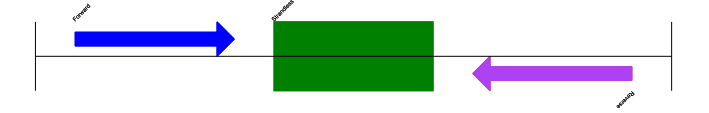

In [10]:
gdd.draw(format='linear', pagesize=(25*cm,4*cm), fragments=1,
         start=0, end=400)

gdd.write("GD_labels_default.png", "png")
Image("GD_labels_default.png")

Ligas de apoyo: 
https://biopython-tutorial.readthedocs.io/en/latest/notebooks/17%20-%20Graphics%20including%20GenomeDiagram.html